In [1]:
import tensorflow
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from PIL import Image, ImageDraw
import imutils
import os
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
os.chdir('/content/drive/My Drive/')

In [3]:
train_data_path = './asl_dataset_new'

In [4]:
num_of_letters = 36
image_size = 100
num_of_channels = 1
num_of_dense_layers_nodes = 512

labels = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q',
          'r','s','t','u','v','w','x','y','z','0','1','2','3','4','5','6','7','8','9']

print(len(labels))


36


In [5]:
#appending image of each type in list
y_unique = []
x_unique = []
for alphanum in os.listdir(train_data_path):
  for image in os.listdir(train_data_path+str('/')+alphanum):
    X = imread(train_data_path+str('/')+alphanum+str('/')+image)
    x_unique.append(X)
    y_unique.append(alphanum)
    break

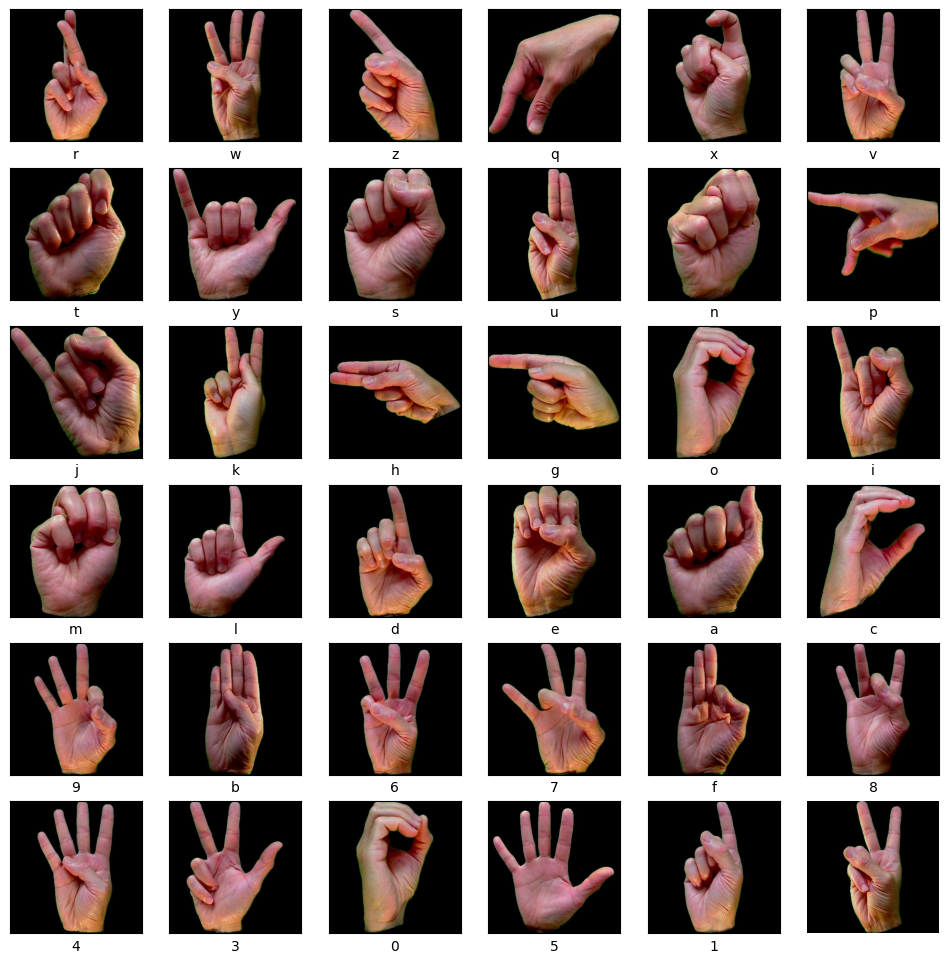

In [6]:
fig = plt.figure(figsize=(12,12))
for i in range(len(x_unique)):
  ax = fig.add_subplot(6,6,i+1)
  ax.imshow(x_unique[i])
  plt.xlabel(y_unique[i])
  plt.xticks([])
  plt.yticks([])
plt.axis('off')
plt.show()
fig.savefig('alphanum')

In [7]:
def create_data(data_path):
  x=[]
  y=[]
  paths=[]
  for label in labels:
    path = os.path.join(data_path,label)
    label_name = labels.index(label)
    for img in os.listdir(path):
      p=os.path.join(path, img)
      paths.append(p)
      print(p)
      try:
        img_array = cv2.imread(p)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        img_array = cv2.resize(img_array, (image_size, image_size))
        x.append(img_array)
        y.append(label_name)
      except Exception as e:
        pass
  return x,y
X_train, y_train = create_data(train_data_path)

./asl_dataset_new/a/hand1_a_right_seg_5_cropped.jpeg
./asl_dataset_new/a/hand1_a_left_seg_5_cropped.jpeg
./asl_dataset_new/a/hand1_a_dif_seg_2_cropped.jpeg
./asl_dataset_new/a/hand1_a_right_seg_4_cropped.jpeg
./asl_dataset_new/a/hand1_a_bot_seg_4_cropped.jpeg
./asl_dataset_new/a/hand1_a_bot_seg_1_cropped.jpeg
./asl_dataset_new/a/hand1_a_top_seg_2_cropped.jpeg
./asl_dataset_new/a/hand1_a_bot_seg_3_cropped.jpeg
./asl_dataset_new/a/hand1_a_left_seg_2_cropped.jpeg
./asl_dataset_new/a/hand1_a_dif_seg_1_cropped.jpeg
./asl_dataset_new/a/hand1_a_dif_seg_5_cropped.jpeg
./asl_dataset_new/a/hand1_a_dif_seg_3_cropped.jpeg
./asl_dataset_new/a/hand1_a_left_seg_3_cropped.jpeg
./asl_dataset_new/a/hand2_a_bot_seg_3_cropped.jpeg
./asl_dataset_new/a/hand1_a_bot_seg_2_cropped.jpeg
./asl_dataset_new/a/hand1_a_right_seg_2_cropped.jpeg
./asl_dataset_new/a/hand1_a_left_seg_1_cropped.jpeg
./asl_dataset_new/a/hand1_a_top_seg_4_cropped.jpeg
./asl_dataset_new/a/hand1_a_right_seg_3_cropped.jpeg
./asl_dataset_new/a

In [8]:
num_of_train_images = len(X_train)
print(len(X_train))

2539


In [9]:
X_train = np.array(X_train)

In [10]:
X_train = X_train.reshape(num_of_train_images,image_size,image_size,num_of_channels)
print(X_train.shape)

(2539, 100, 100, 1)


In [11]:
y_train = to_categorical(y_train, num_of_letters)
print(X_train.shape)

(2539, 100, 100, 1)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='same',activation='relu',input_shape=(image_size,image_size,num_of_channels)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(64,kernel_size=(3,3), padding='same',activation='relu',input_shape=(image_size,image_size,num_of_channels)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(128,kernel_size=(3,3), padding='same',activation='relu',input_shape=(image_size,image_size,num_of_channels)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())

model.add(Dense(num_of_dense_layers_nodes,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_of_letters,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

In [17]:
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_val, y_val),shuffle=True)

Epoch 1/50
64/64 [==============================] - 8s 28ms/step - loss: 4.0852 - accuracy: 0.6750 - val_loss: 0.3638 - val_accuracy: 0.8661
Epoch 2/50
64/64 [==============================] - 1s 16ms/step - loss: 0.2159 - accuracy: 0.9286 - val_loss: 0.2672 - val_accuracy: 0.9213
Epoch 3/50
64/64 [==============================] - 1s 16ms/step - loss: 0.0926 - accuracy: 0.9710 - val_loss: 0.2207 - val_accuracy: 0.9291
Epoch 4/50
64/64 [==============================] - 1s 15ms/step - loss: 0.0412 - accuracy: 0.9838 - val_loss: 0.1932 - val_accuracy: 0.9449
Epoch 5/50
64/64 [==============================] - 1s 16ms/step - loss: 0.0413 - accuracy: 0.9916 - val_loss: 0.1827 - val_accuracy: 0.9469
Epoch 6/50
64/64 [==============================] - 1s 18ms/step - loss: 0.0352 - accuracy: 0.9921 - val_loss: 0.1795 - val_accuracy: 0.9508
Epoch 7/50
64/64 [==============================] - 1s 18ms/step - loss: 0.0363 - accuracy: 0.9882 - val_loss: 0.1649 - val_accuracy: 0.9567
Epoch 8/50
64

In [18]:
#saving the model
model.save("trained_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Training accuracy: {train_accuracy}")
print(f"Validation accuracy: {val_accuracy}")

Training accuracy: 1.0
Validation accuracy: 0.9645669460296631


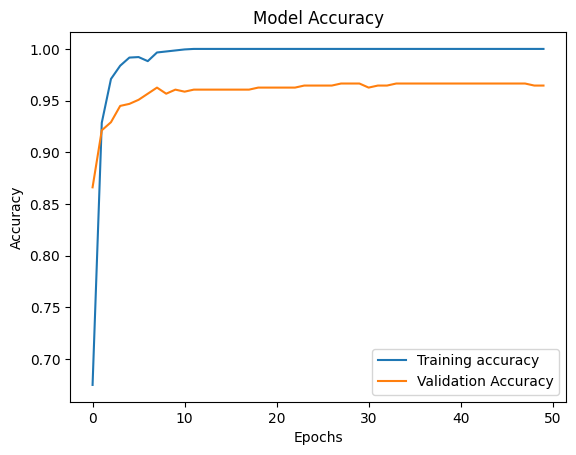

In [20]:
plt.plot(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Validation Accuracy'],loc='best')

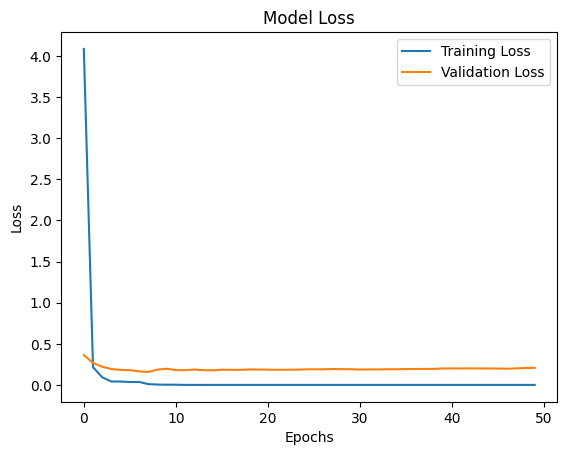

In [21]:
plt.plot(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'],loc='best')